# SF-DAT-21 | Unit Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import feature_selection, linear_model
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

In [2]:
df_raw = pd.read_csv("../../dataset/admissions.csv")
df = df_raw.dropna()
print df.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Part 1. Frequency Tables

#### Question 1. Let's create a frequency table of our variables.

In [3]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [4]:
# frequency table for prestige and whether or not someone was admitted
for prestige_count in np.sort(df.prestige.dropna().unique()):
    print prestige_count, len(df[df.prestige == prestige_count])
    

1.0 61
2.0 148
3.0 121
4.0 67


In [5]:
for gpa_count in np.sort(df.gpa.dropna().unique()):
    print gpa_count, len(df[df.gpa == gpa_count])

2.26 1
2.42 2
2.48 1
2.52 1
2.55 1
2.56 1
2.62 2
2.63 1
2.65 1
2.67 2
2.68 1
2.69 1
2.7 2
2.71 2
2.73 1
2.76 1
2.78 2
2.79 2
2.81 3
2.82 2
2.83 1
2.84 1
2.85 2
2.86 2
2.88 1
2.9 4
2.91 3
2.92 2
2.93 5
2.94 3
2.95 1
2.96 2
2.97 2
2.98 6
3.0 4
3.01 2
3.02 4
3.03 1
3.04 2
3.05 3
3.06 1
3.07 4
3.08 4
3.09 1
3.1 1
3.11 1
3.12 4
3.13 5
3.14 4
3.15 7
3.16 2
3.17 5
3.18 1
3.19 5
3.2 2
3.21 1
3.22 5
3.23 3
3.24 2
3.25 2
3.27 3
3.28 4
3.29 2
3.3 4
3.31 8
3.32 4
3.33 5
3.34 5
3.35 7
3.36 4
3.37 3
3.38 5
3.39 3
3.4 7
3.41 1
3.42 1
3.43 5
3.44 3
3.45 7
3.46 5
3.47 3
3.48 3
3.49 4
3.5 4
3.51 5
3.52 4
3.53 2
3.54 3
3.55 1
3.56 3
3.57 3
3.58 5
3.59 5
3.6 3
3.61 3
3.62 2
3.63 6
3.64 5
3.65 4
3.66 1
3.67 4
3.69 3
3.7 3
3.71 2
3.72 1
3.73 2
3.74 4
3.75 2
3.76 2
3.77 5
3.78 4
3.8 2
3.81 3
3.82 1
3.83 1
3.84 2
3.85 1
3.86 2
3.87 1
3.88 3
3.89 3
3.9 3
3.91 1
3.92 2
3.93 1
3.94 5
3.95 5
3.97 1
3.98 1
3.99 3
4.0 28


In [6]:
for gre_count in np.sort(df.gre.dropna().unique()):
    print gre_count, len(df[df.gre == gre_count])

220.0 1
300.0 3
340.0 4
360.0 4
380.0 8
400.0 11
420.0 7
440.0 10
460.0 13
480.0 16
500.0 21
520.0 24
540.0 27
560.0 24
580.0 28
600.0 23
620.0 30
640.0 21
660.0 23
680.0 20
700.0 22
720.0 11
740.0 11
760.0 5
780.0 5
800.0 25


## Part 2. Return of dummy variables

#### Question 2.1. Create class or dummy variables for prestige.

In [7]:
dummy_ranks = pd.get_dummies(df.prestige, prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']

dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


#### Question 2.2. When modeling our class variables, how many do we need?

Answer: I don't understand the question.  How many dummy variables do we need? 
It depends on the situation.  In the example in class, we chose to have four, because majority of the population fell into 1-4.  In this example, we should include all four prestiges, because they all have good volume. 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [8]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()

   admit  gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           0           1           0
1      1  660  3.67           0           0           1           0
2      1  800  4.00           1           0           0           0
3      1  640  3.19           0           0           0           1
4      0  520  2.93           0           0           0           1


In [9]:
# crosstab prestige 1 admission
# frequency table cutting prestige and whether or not someone was admitted

pd.crosstab(handCalc.prestige_1, df.admit, margins=True)

admit,0,1,All
prestige_1,,,
0.0,243,93,336
1.0,28,33,61
All,271,126,397


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac38510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11addfcd0>]], dtype=object)

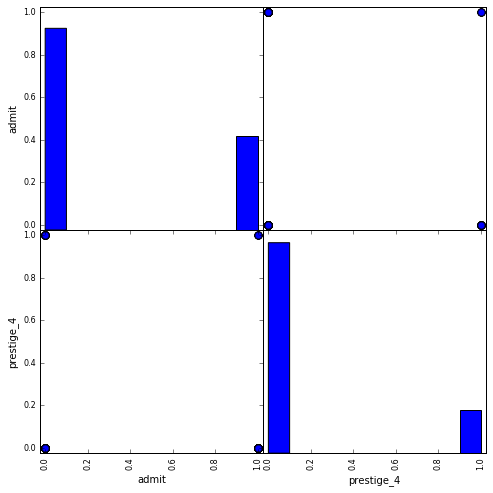

In [12]:
pd.tools.plotting.scatter_matrix(handCalc[ ['admit', 'prestige_4'] ], s = 200, figsize = (8, 8))

In [10]:

pd.crosstab(handCalc.prestige_2, df.admit, margins=True)

admit,0,1,All
prestige_2,,,
0.0,176,73,249
1.0,95,53,148
All,271,126,397


In [36]:
pd.crosstab(handCalc.prestige_3, df.admit, margins=True)
#pd.crosstab(handCalc.prestige_4, df.admit, margins=True)

admit,0,1,All
prestige_3,,,
0.0,178,98,276
1.0,93,28,121
All,271,126,397


In [11]:
handCalc.describe()

,admit,gre,gpa,prestige_1,prestige_2,prestige_3,prestige_4
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,0.153652,0.372796,0.304786,0.168766
std,0.466044,115.717787,0.380208,0.361070,0.484159,0.460898,0.375017
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.400000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


#### Question 3.1. Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college.

In [10]:
33/61 = 54%

SyntaxError: invalid syntax (<ipython-input-10-d6698f7865b2>, line 1)

#### Question 3.2. Now calculate the odds of admission if you did not attend a #1 ranked college.

In [11]:
93/336 = 28%

SyntaxError: invalid syntax (<ipython-input-11-547998c48c68>, line 1)

#### Question 3.3. Calculate the odds ratio.

In [ ]:
the total of the odds ratio for the acceptance rate is 126/397 = 32% 

#### Question 3.4. Write this finding in a sentenance:

Answer: Prestige 1 applicants have higher acceptance rate than the rest of the applicants 

#### Question 3.5. Print the cross tab for prestige_4.

In [12]:
pd.crosstab(handCalc.prestige_4, df.admit, margins=True)

admit,0,1,All
prestige_4,,,
0.0,216,114,330
1.0,55,12,67
All,271,126,397


#### Question 3.6. Calculate the OR.

In [ ]:
12/67 = 18%

#### Question 3.7. Write this finding in a sentence.

Answer: Low acceptance rate for this group of applicants compare to the aveage acceptance rate 32%.

## Part 4. Analysis

In [24]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print data.head()

   admit  gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380  3.61           0           0           1           0
1      1  660  3.67           0           0           1           0
2      1  800  4.00           1           0           0           0
3      1  640  3.19           0           0           0           1
4      0  520  2.93           0           0           0           1


We're going to add a constant term for our Logistic Regression.  The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [15]:
# manually add the intercept
data['intercept'] = 1.0

 Question 4.1. Set the covariates to a variable called train_cols.

In [29]:
train_cols = data[ ['gpa', 'gre', 'prestige_1','prestige_2','prestige_3','prestige_4'] ]

#### Question 4.2. Fit the model.

In [30]:
model_prestige= linear_model.LogisticRegression()
model_prestige.fit(train_cols, df.admit)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Question 4.3. Print the summary results.

In [45]:
print model_prestige.coef_
print model_prestige.intercept_
model_prestige.score(train_cols, df.admit)

fit = sm.OLS(df.admit, train_cols).fit()
fit.summary()

#zip(train_cols.columns.values, feature_selection.f_regression(train_cols, df.admit)[1])

[[ 0.19596439  0.00172658  0.35943456 -0.31929464 -0.88821548 -1.10459122]]
[-1.95266678]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     8.594
Date:                Tue, 29 Mar 2016   Prob (F-statistic):           9.71e-08
Time:                        17:24:34   Log-Likelihood:                -239.02
No. Observations:                 397   AIC:                             490.0
Df Residuals:                     391   BIC:                             513.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gpa            0.1508      0.064      2.349      0.019         0.025     0.277
gre            0.0004      0.000      1.997      0.047      6.48e-06     0.001
prestige_1    -0.2377      0.217     -1.095      0.274        -0.665     0.189
prestige_2    -0.4013      0.207     -1.934      0.054        -0.809     0.007
prestige_3    -0.5287      0.211     -2.508      0.013        -0.943    -0.114
prestige_4    -0.5617      0.208     -2.704      0.007        -0.970    -0.153
==============================================================================
Omnibus:                      152.312   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.314
Skew:                           0.678   Prob(JB):                     1.19e-11
Kurtosis:                       1.904   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 4.4. Calculate the odds ratios of the coeffincients and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params

        conf.columns = ['2.5%', '97.5%', 'OR']

In [ ]:
i dont understand the question. what does the odds ratios of the coeffincients represent?

In [43]:
np.exp(model_prestige.coef_)

array([[ 1.21648359,  1.00172808,  1.43251919,  0.72666141,  0.41138923,
         0.3313463 ]])

#### Question 4.5. Interpret the OR of Prestige_2.

In [ ]:
e^.72666141 = 2.068

Answer: 2.068

#### Question 4.6. Interpret the OR of GPA.

Answer: e^1.21648 = 3.375

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values.  This will allow us to see how the predicted probability of admission increases/decreases across different variables.  First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa".  This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [50]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [51]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### Question 5.1. Recreate the dummy variables.

In [62]:
# recreate the dummy variables

# keep only what we need for making predictions

print gpas
print gres

dummy_gpas = pd.get_dummies(gpas, prefix='gpas')
dummy_gpas.columns = ['gpas_1', 'gpas_2', 'gpas_3', 'gpas_4', 'gpas_5'
                      , 'gpas_6', 'gpas_7', 'gpas_8', 'gpas_9', 'gpas_10']

dummy_gres = pd.get_dummies(gres, prefix='gres')
dummy_gres.columns = ['gres_1', 'gres_2', 'gres_3', 'gres_4', 'gres_5'
                      , 'gres_6', 'gres_7', 'gres_8', 'gres_9', 'gres_10']

cols_to_keep = ['admit']
data = df[cols_to_keep].join(dummy_gres.ix[:, 'gres_1':]).join(dummy_gpas.ix[:, 'gpas_1':])
print data.head()



[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
   admit  gres_1  gres_2  gres_3  gres_4  gres_5  gres_6  gres_7  gres_8  \
0      0       1       0       0       0       0       0       0       0   
1      1       0       1       0       0       0       0       0       0   
2      1       0       0       1       0       0       0       0       0   
3      1       0       0       0       1       0       0       0       0   
4      0       0       0       0       0       1       0       0       0   

   gres_9   ...     gpas_1  gpas_2  gpas_3  gpas_4  gpas_5  gpas_6  gpas_7  \
0       0   ...          1       0       0       0       0       0       0   
1       0   ...          0       1       0       0       0       0       0   
2       0   ...          0       0       1 

#### Question 5.2. Make predictions on the enumerated dataset.

In [64]:
X = data[ [['gpas_1', 'gpas_2', 'gpas_3', 'gpas_4', 'gpas_5'
                      , 'gpas_6', 'gpas_7', 'gpas_8', 'gpas_9', 'gpas_10', 'gres_1', 'gres_2', 'gres_3', 'gres_4', 'gres_5'
                      , 'gres_6', 'gres_7', 'gres_8', 'gres_9', 'gres_10']

] ]
y = data['admit']

model = linear_model.LinearRegression()
model.fit(X,y)

print model.intercept_
print model.coef_
print feature_selection.f_regression(X, y)[1]

TypeError: unhashable type: 'list'

#### Question 5.3. Interpret findings for the last 4 observations.

Answer: Not sure

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [ ]:
x = 